**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [74]:
# write your code here

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [75]:
# write your code here

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

In [76]:
# write your code here


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [77]:
# write your code here

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [78]:
# write your code here

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [79]:
# write your code here

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [80]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [81]:
import numpy as np
from scipy.optimize import minimize

def calculate_optimal_l(kappas):

    # Define the parameters
    eta = 0.5
    w = 1.0

    # Define the profit function
    def profit(l, kappa):
        return -(kappa * l**(1-eta) - w * l)  # We negate the function because scipy.optimize.minimize finds the minimum

    # Define the given solution
    def optimal_l(kappa):
        return ((1-eta)*kappa/w)**(1/eta)

    # For each kappa, find the l that maximizes the profit function and compare it with the given solution
    for kappa in kappas:
        # Find the l that maximizes the profit function
        res = minimize(profit, [1.0], args=(kappa,), bounds=[(0.01, 10.0)])  # We start the search at l=1.0 and limit l to be between 0.01 and 10.0
        l_opt = res.x[0]
        
        # Calculate the given solution
        l_given = optimal_l(kappa)
        
        # Compare the two solutions
        print(f"For kappa = {kappa}, the optimal l found numerically is {l_opt} and the given solution is {l_given}")


In [105]:
# Call function
kappas = [1.0, 2.0]
calculate_optimal_l(kappas)

For kappa = 1.0, the optimal l found numerically is 0.2500023857180673 and the given solution is 0.25
For kappa = 2.0, the optimal l found numerically is 1.0 and the given solution is 1.0


We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [108]:
def calculate_expected_value(eta, w, rho, iota, sigma_epsilon, R, T, initial_K, increment_K, atol):

    # set the seed
    np.random.seed(2023)

    # Define the policy
    def policy(kappa):
        return ((1-eta)*kappa/w)**(1/eta)


    # Define the profit function
    def profit(l, l_prev, kappa):
        return kappa * l**(1-eta) - w * l - (l != l_prev) * iota

    # Initialize K and H
    K = initial_K
    H = 0

    while True:
        # Initialize the sum of profits
        sum_profits = 0

        # Generate K random shock series
        for _ in range(K):
            # Initialize kappa and l
            kappa = np.ones(T)
            l_prev = 0.0

            # Generate a random shock series
            epsilon = np.random.normal(-0.5*sigma_epsilon**2, sigma_epsilon, T)

            # Update kappa
            kappa = np.exp(rho * np.log(kappa) + epsilon)

            # Calculate l
            l = policy(kappa)

            # Add the discounted profit to the sum of profits
            sum_profits += np.sum(R**(-np.arange(T)) * profit(l, l_prev, kappa))

            # Update l_prev
            l_prev = l[-1]

        # Calculate the new expected value of the salon
        H_new = sum_profits / K

        # Check if the change in H is small enough
        if np.isclose(H, H_new):
            break

        # Update H and increase K
        H = H_new
        K += increment_K

    return H, K

# Call the function with the parameters
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1+0.01)**(1/12)
T = 120  # Number of months
initial_K = 1000
increment_K = 100
atol = 0.01


The expected value of the salon is 27.71740445650744 for K = 2800


In [109]:
# Call the function
H, K = calculate_expected_value(eta, w, rho, iota, sigma_epsilon, R, T, initial_K, increment_K, atol)
print(f"The expected value of the salon is {H} for K = {K}")

The expected value of the salon is 27.71740445650744 for K = 2800


Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [102]:
# set the seed
np.random.seed(2023)

def calculate_expected_value_fixed_delta(eta, w, rho, iota, sigma_epsilon, R, T, initial_K, increment_K, Delta):
    # Define the policy
    def policy(kappa, l_prev):
        l_opt = ((1-eta)*kappa/w)**(1/eta)
        return np.where(np.abs(l_prev - l_opt) > Delta, l_opt, l_prev)

    # Define the profit function
    def profit(l, l_prev, kappa):
        return kappa * l**(1-eta) - w * l - (l != l_prev) * iota

    # Initialize K and H
    K = initial_K
    H = 0

    while True:
        # Initialize the sum of profits
        sum_profits = 0

        # Generate K random shock series
        for _ in range(K):
            # Initialize kappa and l
            kappa = np.ones(T)
            l_prev = 0.0

            # Generate a random shock series
            epsilon = np.random.normal(-0.5*sigma_epsilon**2, sigma_epsilon, T)

            # Update kappa
            kappa = np.exp(rho * np.log(kappa) + epsilon)

            # Calculate l
            l = policy(kappa, l_prev)

            # Add the discounted profit to the sum of profits
            sum_profits += np.sum(R**(-np.arange(T)) * profit(l, l_prev, kappa))

            # Update l_prev
            l_prev = l[-1]

        # Calculate the new expected value of the salon
        H_new = sum_profits / K

        # Check if the change in H is small enough
        if np.isclose(H, H_new):
            break

        # Update H and increase K
        H = H_new
        K += increment_K

    return H, K

# Call the function with the parameters
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1+0.01)**(1/12)
T = 120  # Number of months
initial_K = 1000
increment_K = 100
atol = 0.01
Delta = 0.05

H, K = calculate_expected_value_fixed_delta(eta, w, rho, iota, sigma_epsilon, R, T, initial_K, increment_K, Delta)
print(f"The expected value of the salon is {H} for K = {K}")


The expected value of the salon is 27.71740445650744 for K = 2800


**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

The optimal Delta is 0.08080808080808081 and the corresponding H is 27.738872336081908


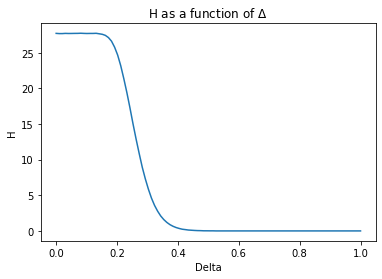

In [97]:
import matplotlib.pyplot as plt

# Define a range of possible Delta values
Delta_values = np.linspace(0, 1, 100)

# set the seed
np.random.seed(2023)

# Initialize a list to store the results
H_values = []

# For each Delta, calculate H and store the result
for Delta in Delta_values:
    H, K = calculate_expected_value_fixed_delta(eta, w, rho, iota, sigma_epsilon, R, T, initial_K, increment_K, atol, Delta)
    H_values.append(H)

# Find the Delta that gives the maximum H
max_index = np.argmax(H_values)
optimal_Delta = Delta_values[max_index]

# Print the optimal Delta and H
print(f"The optimal Delta is {optimal_Delta} and the corresponding H is {H_values[max_index]}")


# Plot H as a function of Delta
plt.plot(Delta_values, H_values)
plt.xlabel('Delta')
plt.ylabel('H')
plt.title('H as a function of $\Delta$')
plt.show()





**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [87]:
# Define the parameters
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1+0.01)**(1/12)
T = 120
initial_K = 1000
increment_K = 100
atol = 0.01
Delta = 0.05

# set the seed
np.random.seed(2023)

def policy(kappa, l_prev, kappa_prev):
    l = np.empty_like(kappa)
    for t in range(len(kappa)):
        l_opt = ((1-eta)*kappa[t]/w)**(1/eta)
        if t == 0:  # For the first period, compare with the initial kappa_prev
            if kappa[t] > kappa_prev:  # If demand is increasing
                l[t] = l_opt + Delta
            elif kappa[t] < kappa_prev:  # If demand is decreasing
                l[t] = max(0, l_opt - Delta)  # Ensure that l doesn't go below 0
            else:  # If demand is stable
                l[t] = l_opt
        else:  # For subsequent periods, compare with the previous period's kappa
            if kappa[t] > kappa[t-1]:  # If demand is increasing
                l[t] = l_opt + Delta
            elif kappa[t] < kappa[t-1]:  # If demand is decreasing
                l[t] = max(0, l_opt - Delta)  # Ensure that l doesn't go below 0
            else:  # If demand is stable
                l[t] = l_opt
    return l


# Define the profit function
def profit(l, l_prev, kappa):
    return kappa * l**(1-eta) - w * l - (l != l_prev) * iota

# Define the function to calculate the expected value of the salon
def calculate_expected_value(eta, w, rho, iota, sigma_epsilon, R, T, initial_K, increment_K, atol, Delta):
    # Initialize K and H
    K = initial_K
    H = 0

    while True:
        # Initialize the sum of profits
        sum_profits = 0

        # Generate K random shock series
        for _ in range(K):
            # Initialize kappa and l
            kappa = np.ones(T)
            l_prev = 0.0
            kappa_prev = 1.0

            # Generate a random shock series
            epsilon = np.random.normal(-0.5*sigma_epsilon**2, sigma_epsilon, T)

            # Update kappa
            kappa = np.exp(rho * np.log(kappa) + epsilon)

            # Calculate l
            l = policy(kappa, l_prev, kappa_prev)

            # Add the discounted profit to the sum of profits
            sum_profits += np.sum(R**(-np.arange(T)) * profit(l, l_prev, kappa))

            # Update l_prev and kappa_prev
            l_prev = l[-1]
            kappa_prev = kappa[-1]

        # Calculate the new expected value of the salon
        H_new = sum_profits / K

        # Check if the change in H is small enough
        if np.isclose(H, H_new, atol=atol):
            break

        # Update H and increase K
        H = H_new
        K += increment_K

    return H, K

# Call the function with the parameters
H, K = calculate_expected_value(eta, w, rho, iota, sigma_epsilon, R, T, initial_K, increment_K, atol, Delta)
print(f"The expected value of the salon is {H} for K = {K}")


The expected value of the salon is 27.41481376087807 for K = 1400


In [65]:
import numpy as np

# Define the parameters
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1+0.01)**(1/12)
T = 120
initial_K = 10
increment_K = 10
atol = 0.01
Delta = 0.05

# Define the baseline policy
def baseline_policy(kappa, l_prev):
    return ((1-eta)*kappa/w)**(1/eta)

# Define the alternative policy
def alternative_policy(kappa, l_prev, kappa_prev):
    l = np.empty_like(kappa)
    for t in range(len(kappa)):
        l_opt = ((1-eta)*kappa[t]/w)**(1/eta)
        if t == 0:  # For the first period, compare with the initial kappa_prev
            if kappa[t] > kappa_prev:  # If demand is increasing
                l[t] = l_opt + Delta
            elif kappa[t] < kappa_prev:  # If demand is decreasing
                l[t] = max(0, l_opt - Delta)  # Ensure that l doesn't go below 0
            else:  # If demand is stable
                l[t] = l_opt
        else:  # For subsequent periods, compare with the previous period's kappa
            if kappa[t] > kappa[t-1]:  # If demand is increasing
                l[t] = l_opt + Delta
            elif kappa[t] < kappa[t-1]:  # If demand is decreasing
                l[t] = max(0, l_opt - Delta)  # Ensure that l doesn't go below 0
            else:  # If demand is stable
                l[t] = l_opt
    return l

# Define the profit function
def profit(l, l_prev, kappa):
    return kappa * l**(1-eta) - w * l - (l != l_prev) * iota

# Define the function to calculate the expected value of the salon
def calculate_expected_value(eta, w, rho, iota, sigma_epsilon, R, T, initial_K, increment_K, atol, Delta, policy):
    # Initialize K and H
    K = initial_K
    H = 0

    while True:
        # Initialize the sum of profits
        sum_profits = 0

        # Generate K random shock series
        for _ in range(K):
            # Initialize kappa and l
            kappa = np.ones(T)
            l_prev = 0.0
            kappa_prev = 1.0

            # Generate a random shock series
            epsilon = np.random.normal(-0.5*sigma_epsilon**2, sigma_epsilon, T)

            # Update kappa
            kappa = np.exp(rho * np.log(kappa) + epsilon)

            # Calculate l
            l = policy(kappa, l_prev, kappa_prev)

            # Add the discounted profit to the sum of profits
            sum_profits += np.sum(R**(-np.arange(T)) * profit(l, l_prev, kappa))

            # Update l_prev and kappa_prev
            l_prev = l[-1]
            kappa_prev = kappa[-1]

        # Calculate the new expected value of the salon
        H_new = sum_profits


## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [88]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [89]:
# write your code here

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [90]:
# write your code here